# Apoio de código

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
## Aqui temos algumas funçoes auxiliares.
def normalizar_imagem(img):
    height, width = img.shape[:2]
    img_f = img.astype(float) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_f[l,c,0] = r/255
            img_f[l,c,1] = g/255
            img_f[l,c,2] = b/255
    return img_f

def desnormalizar_imagem(img):
    height, width = img.shape[:2]
    img_f = img.astype(int) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_f[l,c,0] = r*255 
            img_f[l,c,1] = g*255
            img_f[l,c,2] = b*255
    return img_f

def rgb_to_gray(img):
    height, width = img.shape[:2]
    img_f = img.astype(float) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
            img_f[l,c,0] = img_gray
            img_f[l,c,1] = img_gray
            img_f[l,c,2] = img_gray

    return img_f     

def mostrar_diferenca(img_original, img_modificada, title="diferença"):
    img_original = np.clip(img_original, 0, 255).astype(np.uint8)
    img_modificada = np.clip(img_modificada, 0, 255).astype(np.uint8)

    img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    img_modificada = cv.cvtColor(img_modificada, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(12,5))
    plt.suptitle(title, fontsize=18, fontweight='bold', color='green')
    plt.subplot(121), plt.imshow(img_original), plt.title('Original')
    plt.subplot(122), plt.imshow(img_modificada), plt.title("Modificada")
    plt.tight_layout()
    plt.show()

def mostrar_imagem(img):
    cv.imshow('imagem',img)
    cv.waitKey(0); cv.destroyAllWindows()

sobel = np.array([
    [3, 0, -3],
    [10, 0, -10],
    [3, 0, -3],
])

edge_detection = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125, 0.25, 0.125],
    [0.0625, 0.125, 0.0625]
])


# Questão 1.

In [3]:
def brilho_contraste(img_original, beta, k):
    img = img_original.copy()
    height, width = img.shape[:2]
    numPixels = width * height
    r_ = 0
    g_ = 0
    b_ = 0
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            #print(f'({r}, {g}, {b})')
            r_ += r
            g_ += g
            b_ += b
    r_ /= numPixels
    g_ /= numPixels
    b_ /= numPixels
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            #print(f'({r}, {g}, {b})')
            img[l,c,0] = k*(r - r_) + r_ + beta
            img[l,c,1] =  k*(g - g_) + g_ + beta
            img[l,c,2] = k*(b - b_) + b_ + beta

    return img

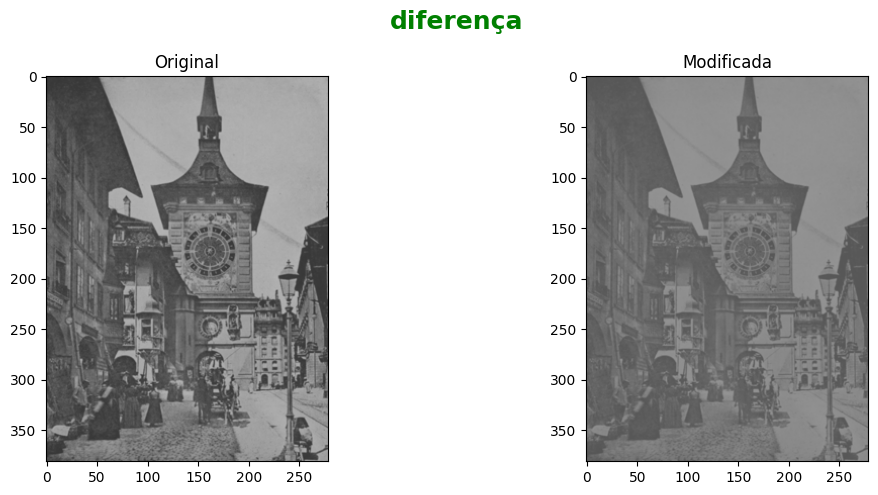

In [62]:
img_1 = normalizar_imagem(cv.imread('PoucoContraste.png'))
img_1_modificada = brilho_contraste(img_1, 0, 0.5)
mostrar_diferenca(desnormalizar_imagem(img_1), desnormalizar_imagem(img_1_modificada))

# Questão 2.

In [4]:
def histograma(img):
    # Considerando a imagem em preto-branco:
    y = []
    for i in range(256):
        pixels_r_i = np.sum(img[:,:,0] == i)
        y.append(pixels_r_i)
    return y

def plot_img_hist(img, img_hist):
    plt.figure(figsize=(12,4))
    plt.subplot(121), plt.bar(range(256),img_hist)
    plt.subplot(122), plt.imshow(img)
    plt.tight_layout()
    plt.show()

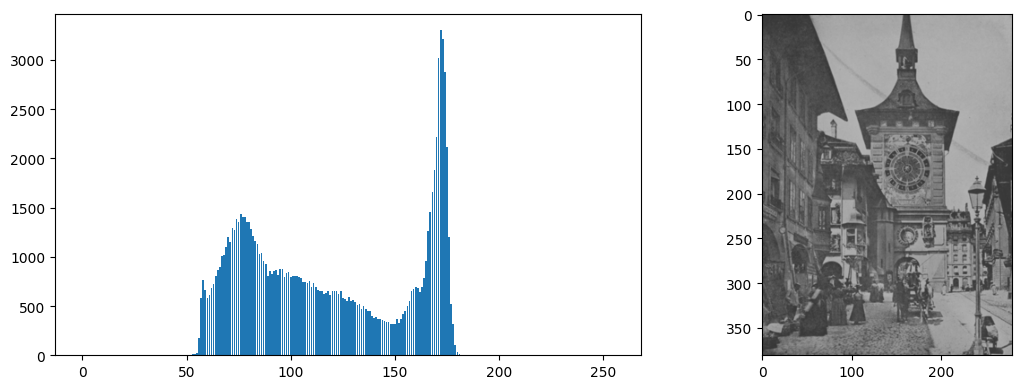

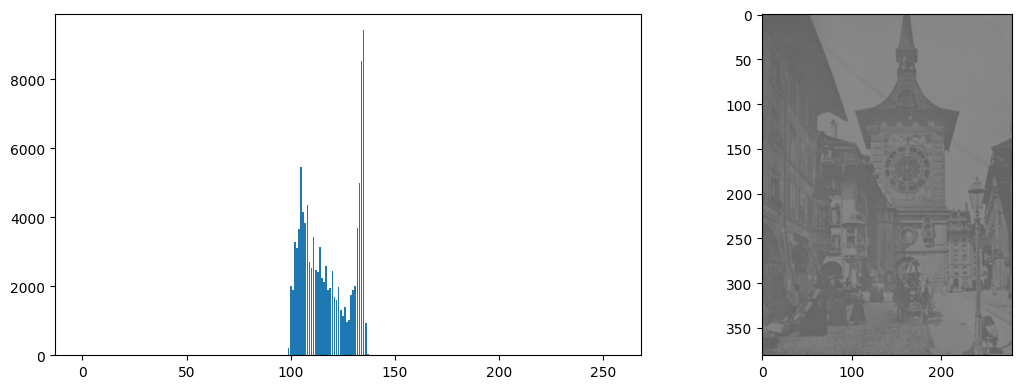

In [40]:
i1_m1 = brilho_contraste(img_1,0, 0.3)
plot_img_hist(img_1, histograma(desnormalizar_imagem(img_1)))
plot_img_hist(i1_m1, histograma(desnormalizar_imagem(i1_m1)))

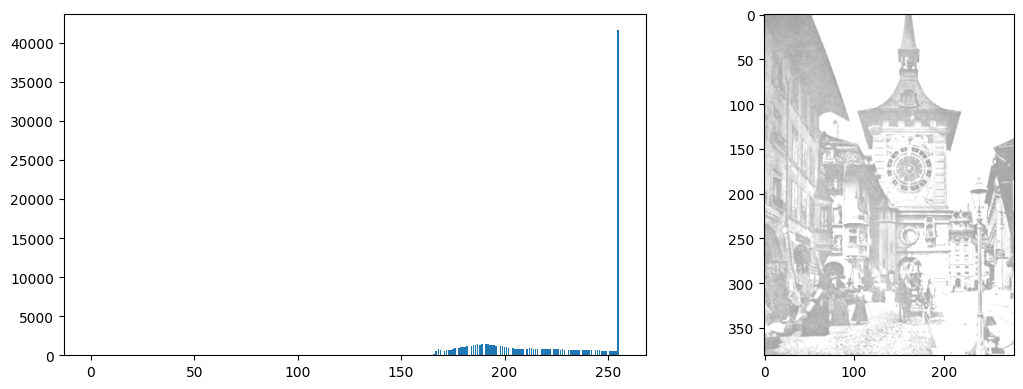

In [41]:
contraste = 300
brilho = 100
img3 = cv.convertScaleAbs(img_1, alpha=contraste, beta=brilho)
y = histograma(img3)
plt.figure(figsize=(12,4))
plt.subplot(121), plt.bar(range(256),y)
plt.subplot(122), plt.imshow(img3)
plt.tight_layout()
plt.show()


A função do opencv não é igual a criada por mim. Lá temos que o valor do pixel é alterado pela fórmula
$$
dst(I) = (|src(I)*alpha + beta|) mod(255)
$$

# Questão 3.

In [5]:
def filter(img, M):
    # Usando somente o canal vermelho:
    m, n = M.shape
    m_ = int(m/2)
    height, width = img.shape[:2]
    img_fiter = img.copy()
    for i in range(height):
        for j in range(width):
            if (j + m_ + 1 >= width or j - m_ <= 0 or i + m_ + 1 >= height or i - m_ < 0):
                continue
            for channel in range(3):
                I = img[i - m_: i + m_ + 1,j - m_: j + m_ + 1,channel]
                pixel_count = 0
                for i_ in range(m):
                    for j_ in range(n):
                        pixel_count += M[m - 1 - i_, n - 1 - j_] * I[i_, j_]
                img_fiter[i, j, channel] = pixel_count


    return img_fiter   
            

In [6]:
# Filtros:
a = 2
A = np.array([
    [a, a, a],
    [a, a, a],
    [a, a, a],
])
B1 = np.array([
    [-1, 0, 1],
    [0, 0, 0],
    [0, 0, 0],
])
B2 = B1.T

C_sobel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])
C_sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

D_gaussian_5x5 = np.array([
    [0.0235, 0.0335, 0.0383, 0.0335, 0.0235],
    [0.0335, 0.0477, 0.0545, 0.0477, 0.0335],
    [0.0383, 0.0545, 0.0623, 0.0545, 0.0383],
    [0.0335, 0.0477, 0.0545, 0.0477, 0.0335],
    [0.0235, 0.0335, 0.0383, 0.0335, 0.0235]
])


C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3868\2653183573.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_original = int(original_point[0])
C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3868\2653183573.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_original = int(original_point[1])


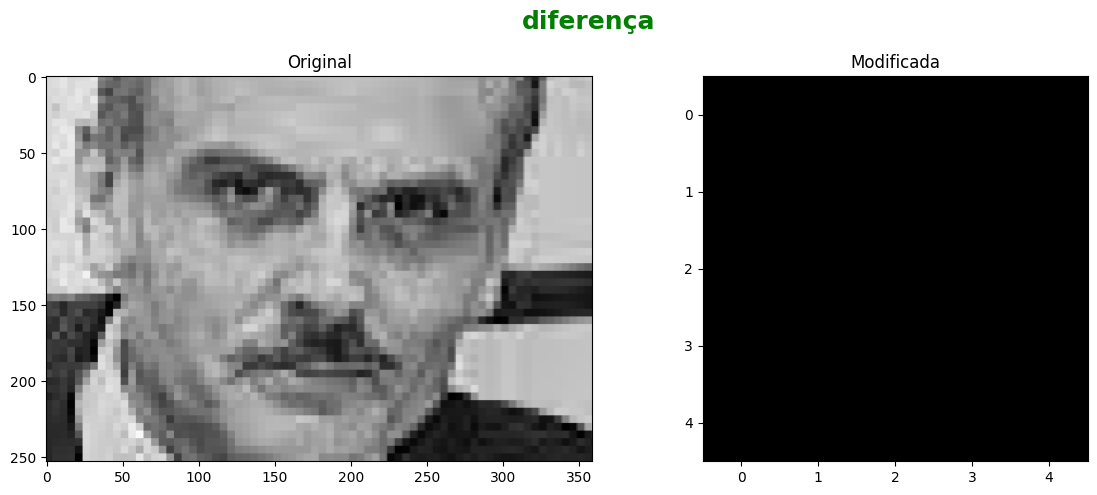

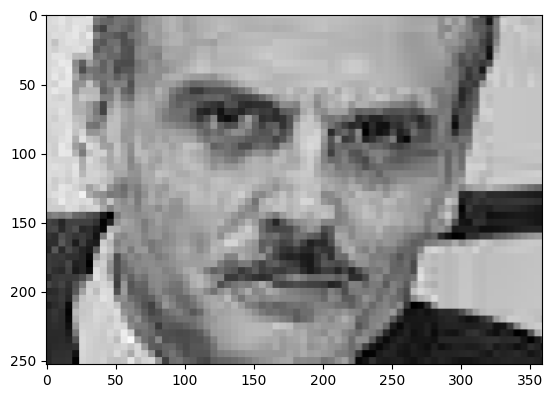

In [ ]:

def scale(img, factorx, factory):
    # Creating the matrix
    H = np.array([
        [factorx, 0, 0],
        [0, factory, 0],
        [0, 0, 1]
    ])
    H_inv = np.linalg.inv(H)

    new_width = int(img.shape[1] * factorx)
    new_height = int(img.shape[0] * factory)
    img_scaled = np.ndarray((new_height, new_width, 3), dtype=img.dtype)

    # Filling the scaled image
    for y in range(new_height):
        for x in range(new_width):
            point_vector = np.array([[x], [y], [1]])
            original_point = H_inv @ point_vector
            x_original = int(original_point[0])
            y_original = int(original_point[1])
            if 0 <= x_original < img.shape[1] and 0 <= y_original < img.shape[0]:
                img_scaled[y, x] = img[y_original, x_original] 
    
    return img_scaled

img_codd = scale(cv.imread('cod.png'),1/4, 1/4)
mostrar_diferenca(img_codd, D_gaussian_5x5)
plt.imshow(img_codd)
plt.show()

In [44]:
img_original = cv.imread('Chess_Board.svg.png')

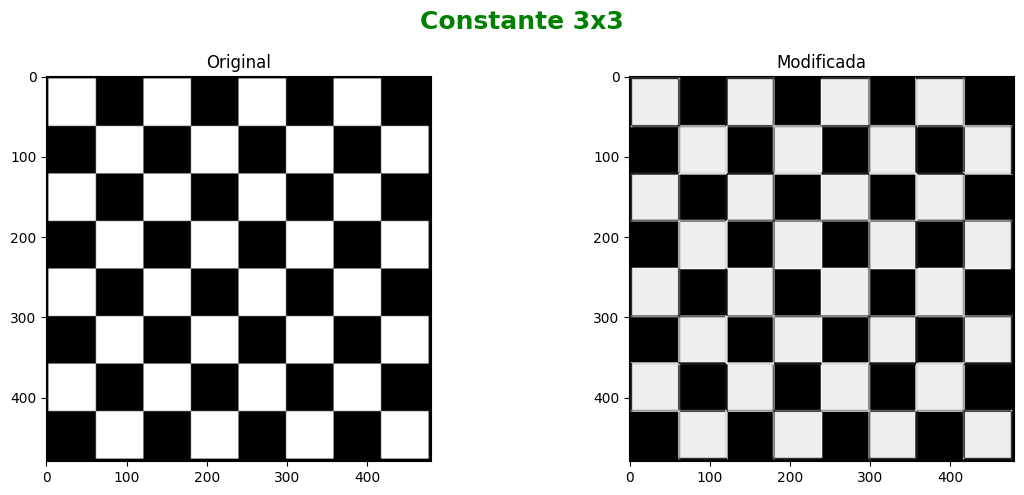

In [45]:
mostrar_diferenca(img_original, filter(img_original, A), title="Constante 3x3")


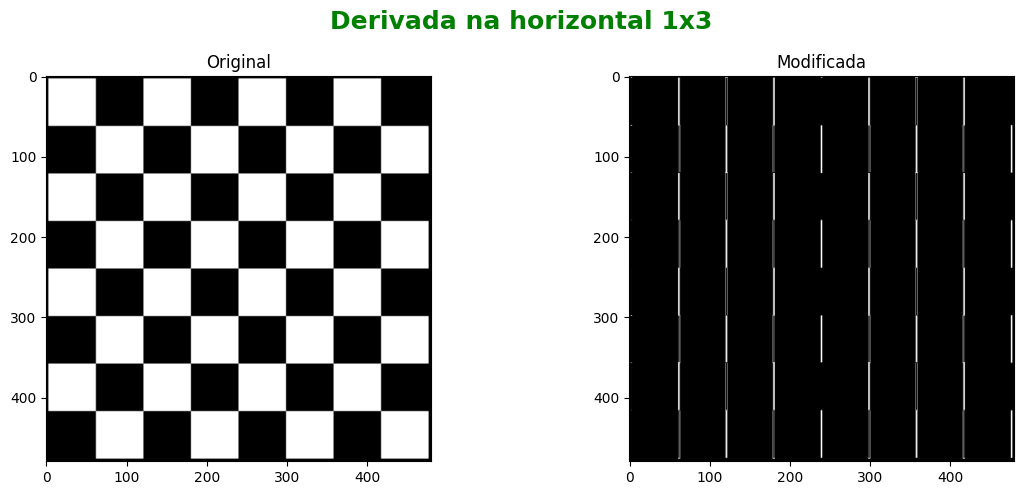

In [46]:
mostrar_diferenca(img_original, filter(img_original, B1), title="Derivada na horizontal 1x3")


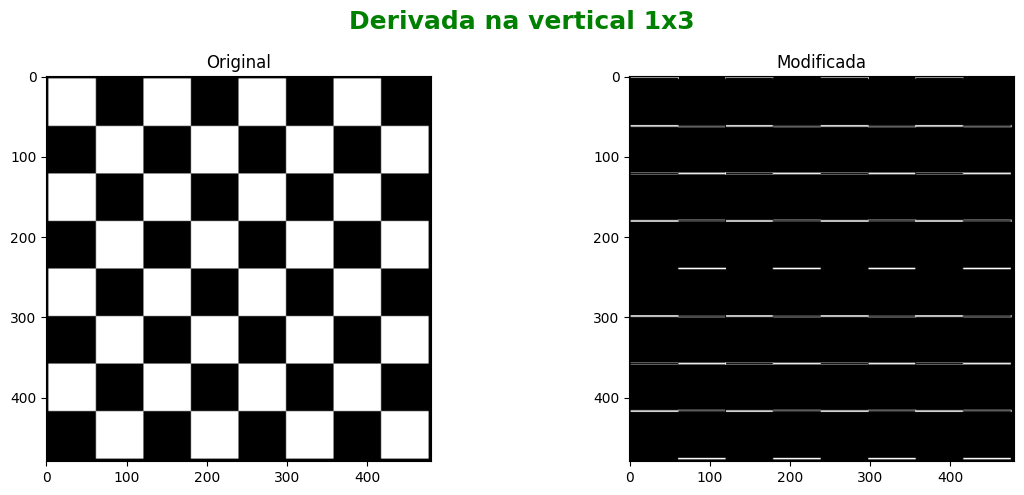

In [47]:
mostrar_diferenca(img_original, filter(img_original, B2), title="Derivada na vertical 1x3")


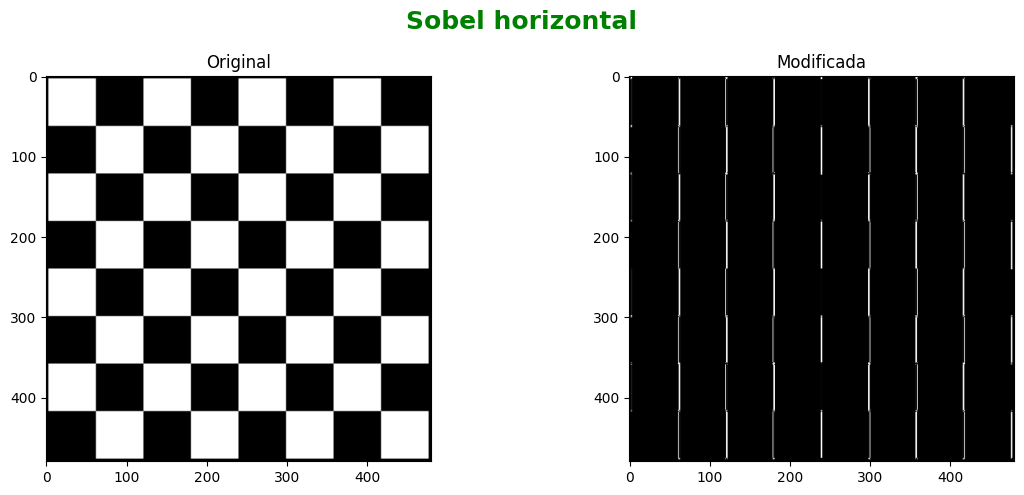

In [48]:
mostrar_diferenca(img_original, filter(img_original, C_sobel_x), title="Sobel horizontal")


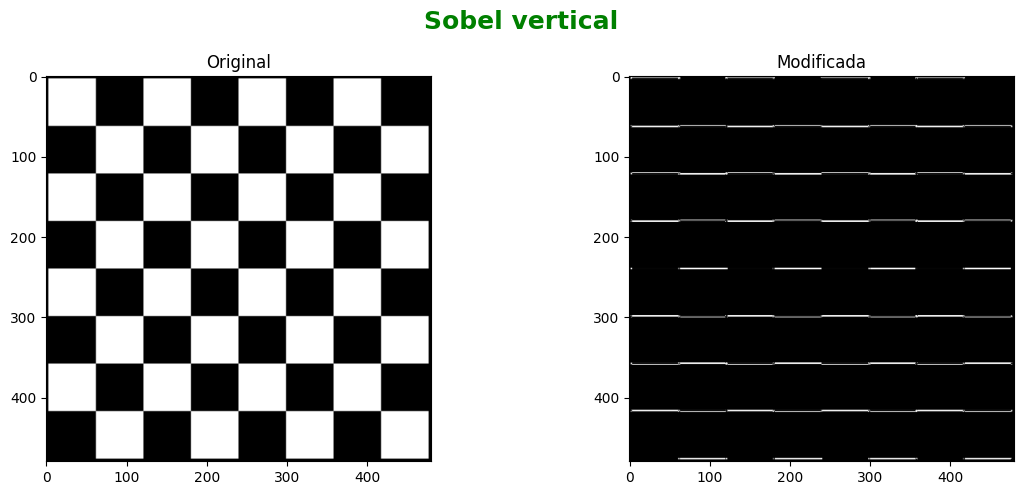

In [49]:
mostrar_diferenca(img_original, filter(img_original, C_sobel_y), title="Sobel vertical")

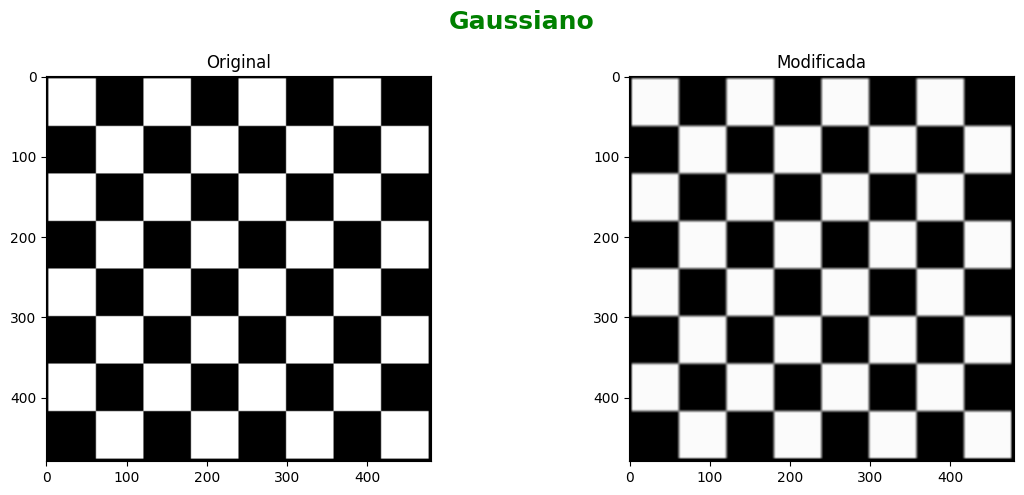

In [50]:
mostrar_diferenca(img_original, filter(img_original, D_gaussian_5x5), title="Gaussiano")

# Questão 4.

In [14]:
img_4 = cv.imread('casa.jpg')

def scale(img, factorx, factory):
    # Creating the matrix
    H = np.array([
        [factorx, 0, 0],
        [0, factory, 0],
        [0, 0, 1]
    ])
    H_inv = np.linalg.inv(H)

    new_width = int(img.shape[1] * factorx)
    new_height = int(img.shape[0] * factory)
    img_scaled = np.ndarray((new_height, new_width, 3), dtype=img.dtype)

    # Filling the scaled image
    for y in range(new_height):
        for x in range(new_width):
            point_vector = np.array([[x], [y], [1]])
            original_point = H_inv @ point_vector
            x_original = int(original_point[0])
            y_original = int(original_point[1])
            if 0 <= x_original < img.shape[1] and 0 <= y_original < img.shape[0]:
                img_scaled[y, x] = img[y_original, x_original] 
    
    return img_scaled
            


C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3604\318358899.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_original = int(original_point[0])
C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3604\318358899.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_original = int(original_point[1])


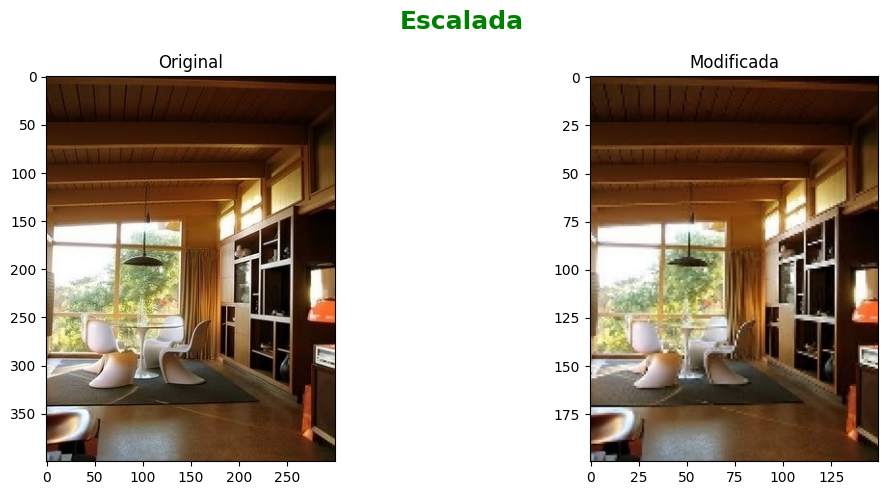

In [52]:
img_4_scaled = scale(img_4,1/2,1/2)
mostrar_diferenca(img_4, img_4_scaled, title='Escalada')

C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3604\318358899.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_original = int(original_point[0])
C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3604\318358899.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_original = int(original_point[1])


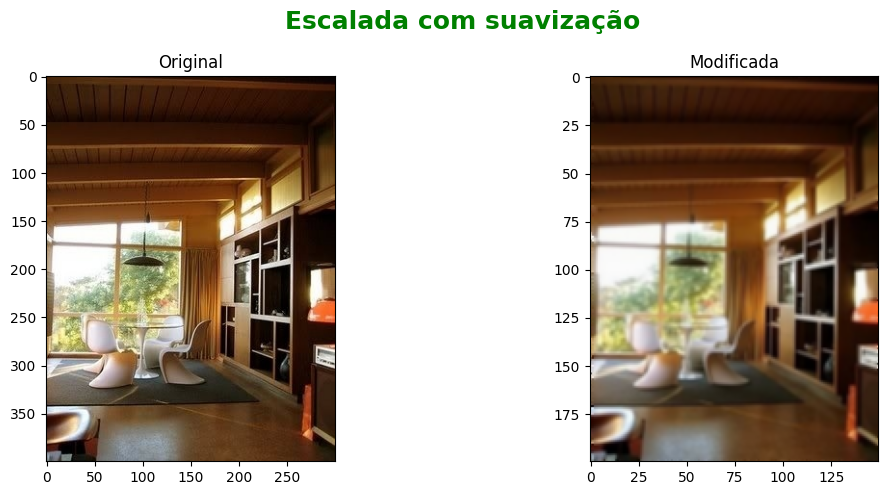

In [53]:
img_4_scaled_smooth = scale(filter(img_4, D_gaussian_5x5), 1/2, 1/2)
mostrar_diferenca(img_4, img_4_scaled_smooth, title='Escalada com suavização')

# Questão 5.


## Questão 5.1


In [54]:
def ruido_gaussiano(img, media=0, desvio=10):
    G = np.random.normal(media, desvio, img.shape[0]*img.shape[1]*3).reshape(img.shape[0], img.shape[1], 3)
    img_noise = G + img

    img_noise = img_noise.astype(dtype=img.dtype)

    return img_noise

       

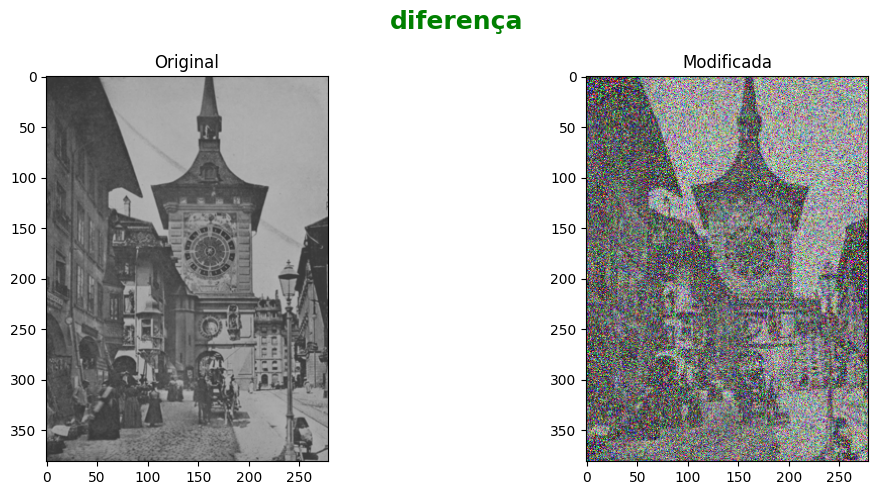

In [55]:
img_5_1 = cv.imread('PoucoContraste.png')

img_5_1_noise = ruido_gaussiano(img_5_1, desvio=50)
mostrar_diferenca(img_5_1, img_5_1_noise)

## Questão 5.2


In [56]:
img_5_2 = cv.imread('leao.jpg')

In [57]:
def kuwahara(img, kernel_size):
    img = img.astype(np.float64)
    img_kuwahara = img.copy()
    a = int((kernel_size - 1) / 2)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            Q1 = img[y : y + a + 1 , x : x + a + 1]
            Q2 = img[y : y + a + 1, x - a : x + 1]
            Q3 = img[y - a : y + 1, x - a : x + 1]
            Q4 = img[y - a : y + 1, x : x + a + 1]
            
            Q_list = [Q1, Q2, Q3, Q4]
            var_list = []
            mean_vector_list = []
            for Q in Q_list:
                Q_flat = Q.reshape(-1, 3)
                u = np.mean(Q_flat, axis=0)
                mean_vector_list.append(u)
                Q_centered = Q_flat - u
                Covariance = np.dot(Q_centered.T, Q_centered) / Q_flat.shape[0] 
                var = np.trace(Covariance)
                var_list.append(var)
            
            mean_vector = mean_vector_list[var_list.index(min(var_list))]
            img_kuwahara[y,x] = mean_vector
    return img_kuwahara



In [63]:
img_5_2_normal = normalizar_imagem(img_5_2)
img_5_2_kuwahara = kuwahara(img_5_2_normal, 5)


c:\Users\Matheus Pinto\Documents\fgv\mestrado\Visão_computacional\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Matheus Pinto\Documents\fgv\mestrado\Visão_computacional\.venv\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3604\3434820931.py:20: RuntimeWarning: invalid value encountered in divide
  Covariance = np.dot(Q_centered.T, Q_centered) / Q_flat.shape[0]


In [ ]:
img_cod_normal = normalizar_imagem(img_codd)

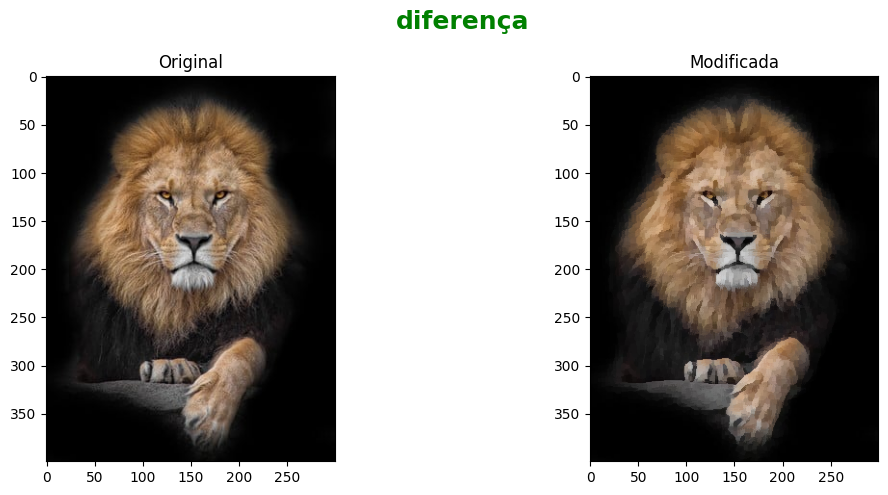

In [ ]:
mostrar_diferenca(desnormalizar_imagem(img_5_2_normal), desnormalizar_imagem(img_5_2_kuwahara))

C:\Users\Matheus Pinto\AppData\Local\Temp\ipykernel_3604\3434820931.py:20: RuntimeWarning: invalid value encountered in divide
  Covariance = np.dot(Q_centered.T, Q_centered) / Q_flat.shape[0]


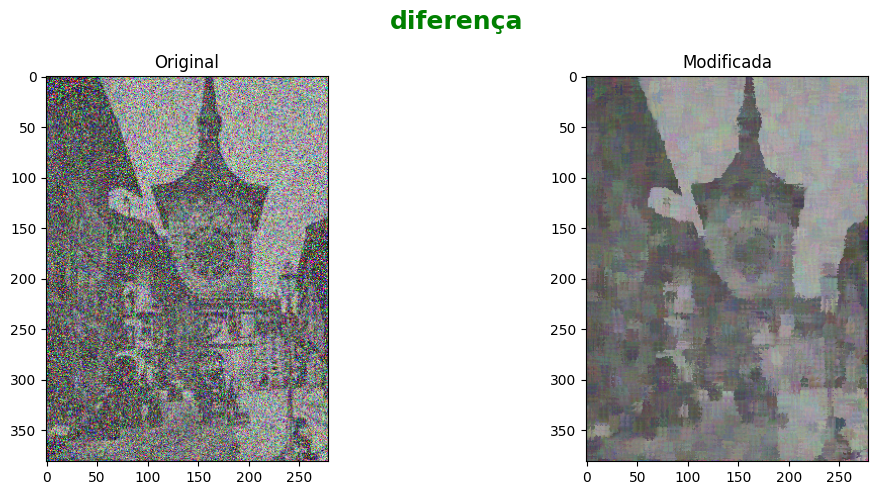

In [64]:
img_5_1_noise_kuwahara = kuwahara(img_5_1_noise, 11)
mostrar_diferenca(img_5_1_noise, img_5_1_noise_kuwahara)